# SREELEKSHMY A - 20MAI0017

https://github.com/sreelekshmyanil/ML-Assignments---VIT

# Clustering :-

Clustering is the task of dividing the data points into a number of groups such that data points in the same groups are similar to other data points in the same group.

Types :-

1. Partitioning based Clustering - KMeans

In this type, the dataset is divided into a set of k groups, where K is used to define the number of pre-defined groups. The cluster center is created in such a way that the distance between the data points of one cluster is minimum as compared to another cluster centroid.

2. Hierarchical Clustering - Agglomerative

In this technique, the dataset is divided into clusters to create a tree-like structure, which is also called a dendrogram. The observations or any number of clusters can be selected by cutting the tree at the correct level. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading Dataset
data = pd.read_excel('bev.xlsx')

# Exploratory data analysis

In [4]:
#exploring dataset
data.head()

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       20 non-null     object 
 1   Potassium  20 non-null     int64  
 2   Sodium     20 non-null     int64  
 3   Caffeine   20 non-null     float64
 4   Cost       20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [6]:
#statistical info
data.describe()

,Potassium,Sodium,Caffeine,Cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.550000,14.950000,4.240000,0.494500
std,30.283702,6.581273,1.087924,0.144858
min,68.000000,6.000000,0.900000,0.280000
25%,110.250000,9.500000,4.175000,0.427500
50%,144.000000,15.000000,4.600000,0.435000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [7]:
#checking for null
data.isnull().values.any()

False

In [8]:
data.dtypes

Name          object
Potassium      int64
Sodium         int64
Caffeine     float64
Cost         float64
dtype: object

In [9]:
#data["Name"].unique()

In [10]:
#data.loc[data['Name'] == 'jacobs_coffee']

In [11]:
#Encoding
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# data['Name'] = labelencoder.fit_transform(data['Name'])

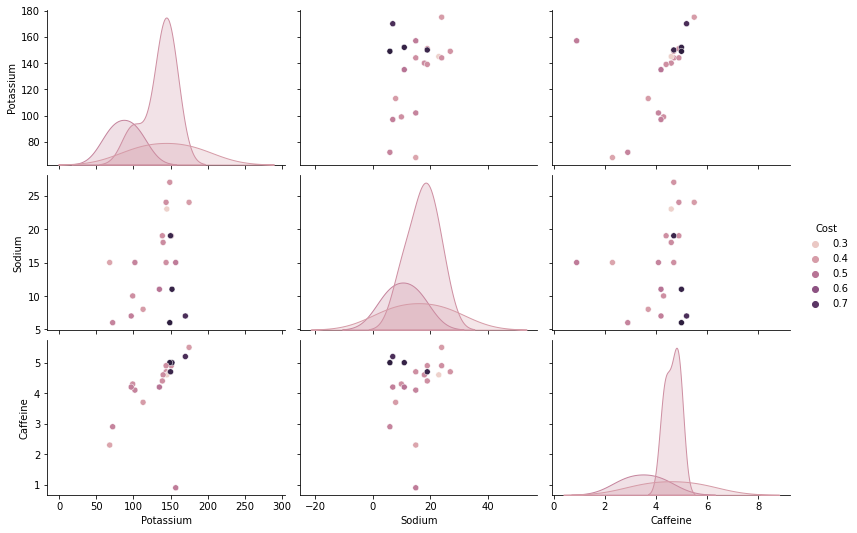

In [12]:
sns.pairplot(data.drop('Name', axis=1), hue='Cost', aspect=1.5)
plt.show()

# 1. KMean clustering

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
        Compute the sum of the squared distance between data points and all centroids.
        Assign each data point to the closest cluster (centroid).
        Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In [13]:
from sklearn.cluster import KMeans

In [14]:
#Name doesnt add any information
dt = data[['Potassium','Sodium','Caffeine','Cost']]

In [15]:
# shuffle the DataFrame rows
dt = dt.sample(frac = 1)

In [16]:
 # print the shuffled DataFrame
dt.head(10)

,Potassium,Sodium,Caffeine,Cost
8,99,10,4.3,0.43
5,145,23,4.6,0.28
14,149,6,5.0,0.79
7,149,27,4.7,0.42
11,102,15,4.1,0.46
13,150,19,4.7,0.76
19,97,7,4.2,0.47
12,135,11,4.2,0.50
6,175,24,5.5,0.40
15,68,15,2.3,0.38


# Elbow method to find k

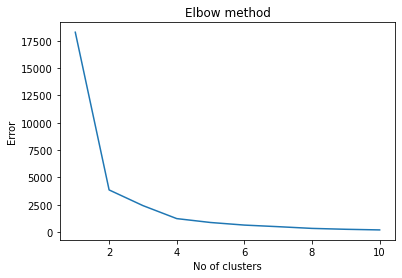

In [17]:
#Elbow method to find k
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(dt)
    Error.append(kmeans.inertia_)

#plotting
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph

In [18]:
#with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(dt)

In [19]:
#The output variable is kmeans.labels_

In [20]:
data["Kmeans"] = kmeans.labels_

In [21]:
print("Cluster centers : \n\n",kmeans.cluster_centers_)

Cluster centers : 

 [[150.          17.           4.52142857   0.52071429]
 [ 70.          10.5          2.6          0.42      ]
 [102.75        10.           4.075        0.44      ]]


<AxesSubplot:xlabel='Kmeans', ylabel='Cost'>

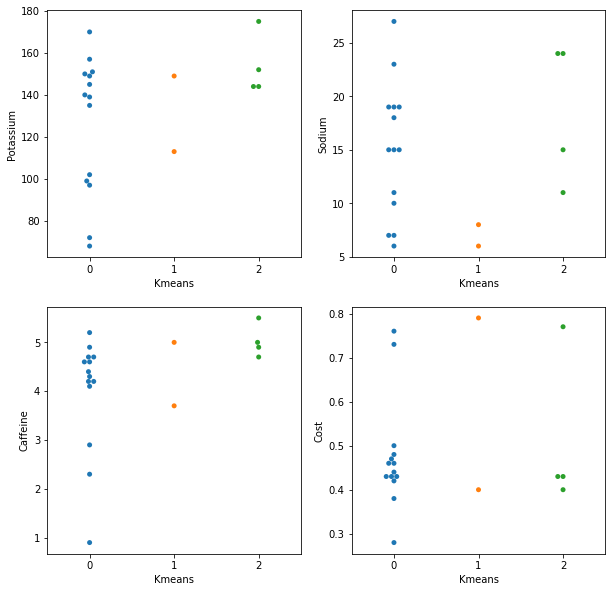

In [22]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.swarmplot(ax=axes[0,0],x = data.Kmeans,y = data.Potassium)
sns.swarmplot(ax=axes[0,1],x = data.Kmeans,y = data.Sodium)
sns.swarmplot(ax=axes[1,0],x = data.Kmeans,y = data.Caffeine)
sns.swarmplot(ax=axes[1,1],x = data.Kmeans,y = data.Cost)

In [23]:
print("The obtained clusters are : \n")
for name,group in data.groupby('Kmeans'):
    print(group,end='\n\n')
    print('-------------------------------------------------------------------')

The obtained clusters are : 

                     Name  Potassium  Sodium  Caffeine  Cost  Kmeans
1        post_alley_blend        151      19       4.9  0.43       0
2        stumpdown_coffee        157      15       0.9  0.48       0
3    bizzy_organic_coffee        170       7       5.2  0.73       0
5           jacobs_coffee        145      23       4.6  0.28       0
7      la_columbe_corisca        149      27       4.7  0.42       0
8     lavazza_super_crema         99      10       4.3  0.43       0
10         red_bay_coffee        140      18       4.6  0.44       0
11     peerless_wholebean        102      15       4.1  0.46       0
12    stone_street_coffee        135      11       4.2  0.50       0
13  green_mountain_coffee        150      19       4.7  0.76       0
15         caribou_coffee         68      15       2.3  0.38       0
16  irish_hazelnut_coffee        139      19       4.4  0.43       0
18        davidoff_coffee         72       6       2.9  0.46       0
19  

In [24]:
#scaling down features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Potassium','Sodium','Caffeine','Cost']])

In [25]:
scaled_data[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

In [26]:
#clustering again
kmeans_new = KMeans(n_clusters=3, random_state=0).fit(scaled_data)

In [27]:
data["Kmeans_scaled"] = kmeans_new.labels_

In [28]:
print("Cluster centers : \n\n",kmeans.cluster_centers_)

Cluster centers : 

 [[150.          17.           4.52142857   0.52071429]
 [ 70.          10.5          2.6          0.42      ]
 [102.75        10.           4.075        0.44      ]]


<AxesSubplot:xlabel='Kmeans_scaled', ylabel='Cost'>

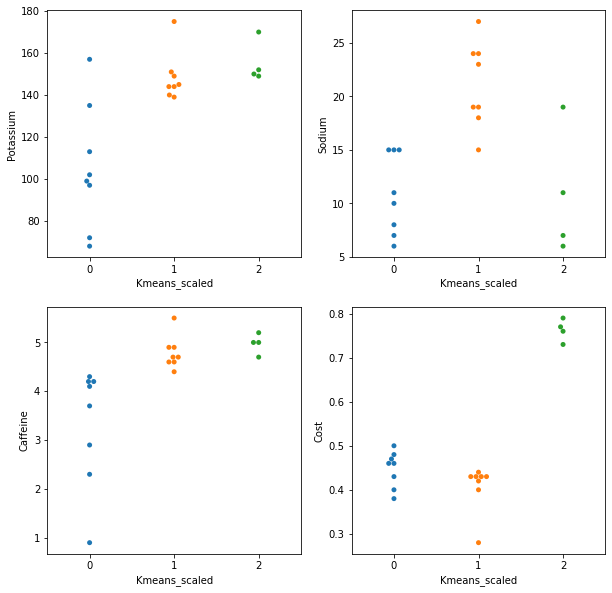

In [29]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.swarmplot(ax=axes[0,0],x = data.Kmeans_scaled,y = data.Potassium)
sns.swarmplot(ax=axes[0,1],x = data.Kmeans_scaled,y = data.Sodium)
sns.swarmplot(ax=axes[1,0],x = data.Kmeans_scaled,y = data.Caffeine)
sns.swarmplot(ax=axes[1,1],x = data.Kmeans_scaled,y = data.Cost)

In [30]:
print("The obtained clusters are : \n")
for name,group in data.groupby('Kmeans_scaled'):
    print(group,end='\n\n')
    print('-------------------------------------------------------------------')

The obtained clusters are : 

                   Name  Potassium  Sodium  Caffeine  Cost  Kmeans  \
2      stumpdown_coffee        157      15       0.9  0.48       0   
8   lavazza_super_crema         99      10       4.3  0.43       0   
9           mount_hagen        113       8       3.7  0.40       1   
11   peerless_wholebean        102      15       4.1  0.46       0   
12  stone_street_coffee        135      11       4.2  0.50       0   
15       caribou_coffee         68      15       2.3  0.38       0   
18      davidoff_coffee         72       6       2.9  0.46       0   
19            js_coffee         97       7       4.2  0.47       0   

    Kmeans_scaled  
2               0  
8               0  
9               0  
11              0  
12              0  
15              0  
18              0  
19              0  

-------------------------------------------------------------------
                     Name  Potassium  Sodium  Caffeine  Cost  Kmeans  \
0      new_england

# 2. Agglomerative Clustering

1. Preparing the data
2. Computing (dis)similarity information between every pair of objects in the data set.
3. Using linkage function to group objects into hierarchical cluster tree, based on the distance information generated at step 1. Objects/clusters that are in close proximity are linked together using the linkage function.
4. Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.

Dendogram :- The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram. 

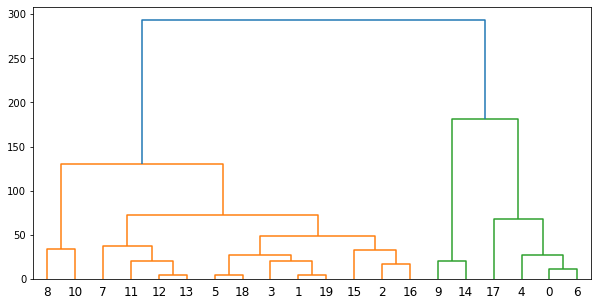

In [31]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(dt,dt)
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(10,5))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12)

In [32]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3).fit(dt)

In [33]:
data["Agglomerative"] = clustering.labels_

In [34]:
print("The obtained clusters are : \n")
for name,group in data.groupby('Agglomerative'):
    print(group,end='\n\n')
    print('-------------------------------------------------------------------')

The obtained clusters are : 

                     Name  Potassium  Sodium  Caffeine  Cost  Kmeans  \
1        post_alley_blend        151      19       4.9  0.43       0   
2        stumpdown_coffee        157      15       0.9  0.48       0   
3    bizzy_organic_coffee        170       7       5.2  0.73       0   
5           jacobs_coffee        145      23       4.6  0.28       0   
7      la_columbe_corisca        149      27       4.7  0.42       0   
8     lavazza_super_crema         99      10       4.3  0.43       0   
10         red_bay_coffee        140      18       4.6  0.44       0   
11     peerless_wholebean        102      15       4.1  0.46       0   
12    stone_street_coffee        135      11       4.2  0.50       0   
13  green_mountain_coffee        150      19       4.7  0.76       0   
15         caribou_coffee         68      15       2.3  0.38       0   
16  irish_hazelnut_coffee        139      19       4.4  0.43       0   
18        davidoff_coffee         

<AxesSubplot:xlabel='Agglomerative', ylabel='Cost'>

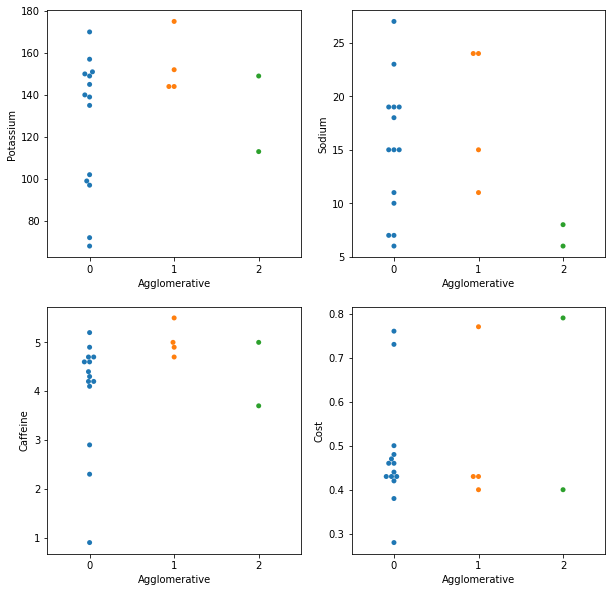

In [35]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.swarmplot(ax=axes[0,0],x = data.Agglomerative,y = data.Potassium)
sns.swarmplot(ax=axes[0,1],x = data.Agglomerative,y = data.Sodium)
sns.swarmplot(ax=axes[1,0],x = data.Agglomerative,y = data.Caffeine)
sns.swarmplot(ax=axes[1,1],x = data.Agglomerative,y = data.Cost)

In [36]:
#scaling down features
scaled = scaler.fit_transform(data[['Potassium','Sodium','Caffeine','Cost']])

In [37]:
clustering = AgglomerativeClustering(n_clusters = 3).fit(scaled)

In [38]:
data["Agglomerative_scaled"] = clustering.labels_

<AxesSubplot:xlabel='Agglomerative_scaled', ylabel='Cost'>

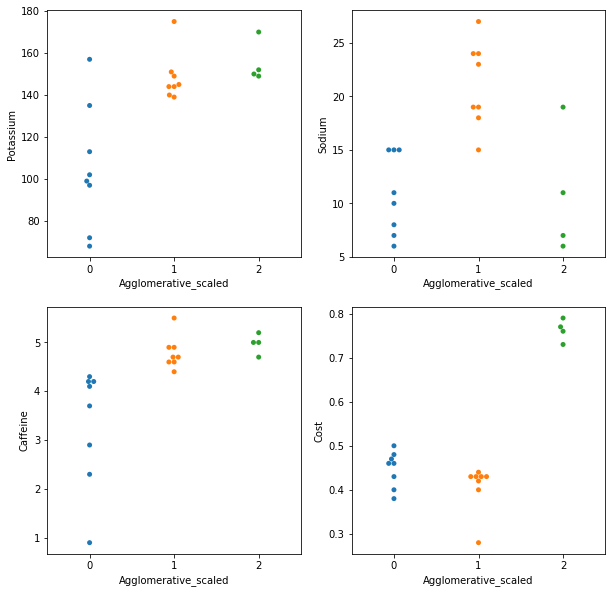

In [39]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.swarmplot(ax=axes[0,0],x = data.Agglomerative_scaled,y = data.Potassium)
sns.swarmplot(ax=axes[0,1],x = data.Agglomerative_scaled,y = data.Sodium)
sns.swarmplot(ax=axes[1,0],x = data.Agglomerative_scaled,y = data.Caffeine)
sns.swarmplot(ax=axes[1,1],x = data.Agglomerative_scaled,y = data.Cost)

In [40]:
#You can see algorithm divides cluster based on Cost as a parameter

In [41]:
print("The obtained clusters are : \n")
for name,group in data.groupby('Agglomerative_scaled'):
    print(group,end='\n\n')
    print('-------------------------------------------------------------------')

The obtained clusters are : 

                   Name  Potassium  Sodium  Caffeine  Cost  Kmeans  \
2      stumpdown_coffee        157      15       0.9  0.48       0   
8   lavazza_super_crema         99      10       4.3  0.43       0   
9           mount_hagen        113       8       3.7  0.40       1   
11   peerless_wholebean        102      15       4.1  0.46       0   
12  stone_street_coffee        135      11       4.2  0.50       0   
15       caribou_coffee         68      15       2.3  0.38       0   
18      davidoff_coffee         72       6       2.9  0.46       0   
19            js_coffee         97       7       4.2  0.47       0   

    Kmeans_scaled  Agglomerative  Agglomerative_scaled  
2               0              0                     0  
8               0              0                     0  
9               0              2                     0  
11              0              0                     0  
12              0              0                     0

# Comparison

In [42]:
print("Clusters obtained :- \n")
print("Kmean without scaling :")
print(data.groupby('Kmeans').groups)
print('\n')
print("Agglomerative without scaling :")
print(data.groupby('Agglomerative').groups)
print('\n')
print("Kmean with scaling :")
print(data.groupby('Kmeans_scaled').groups)
print('\n')
print("Agglomerative with scaling :")
print(data.groupby('Agglomerative_scaled').groups)

Clusters obtained :- 

Kmean without scaling :
{0: [1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 18, 19], 1: [9, 14], 2: [0, 4, 6, 17]}


Agglomerative without scaling :
{0: [1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 18, 19], 1: [0, 4, 6, 17], 2: [9, 14]}


Kmean with scaling :
{0: [2, 8, 9, 11, 12, 15, 18, 19], 1: [0, 1, 5, 6, 7, 10, 16, 17], 2: [3, 4, 13, 14]}


Agglomerative with scaling :
{0: [2, 8, 9, 11, 12, 15, 18, 19], 1: [0, 1, 5, 6, 7, 10, 16, 17], 2: [3, 4, 13, 14]}


# Visualization

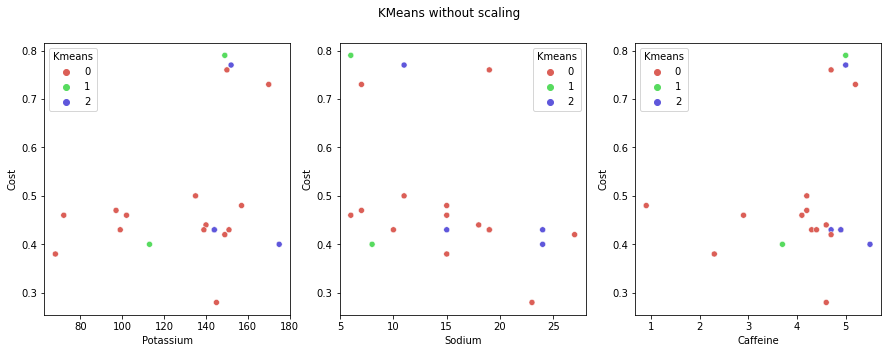

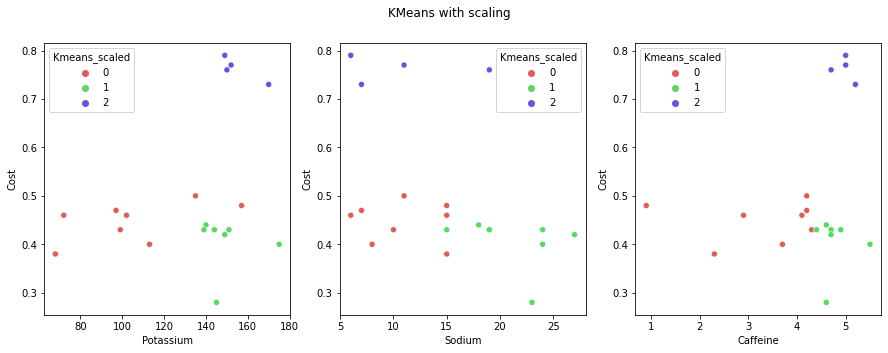

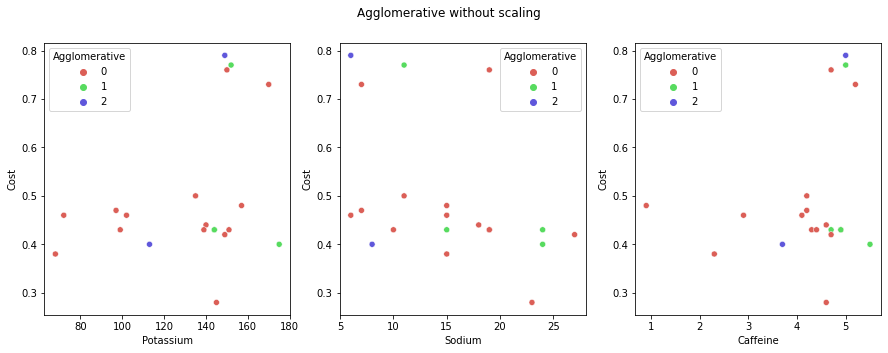

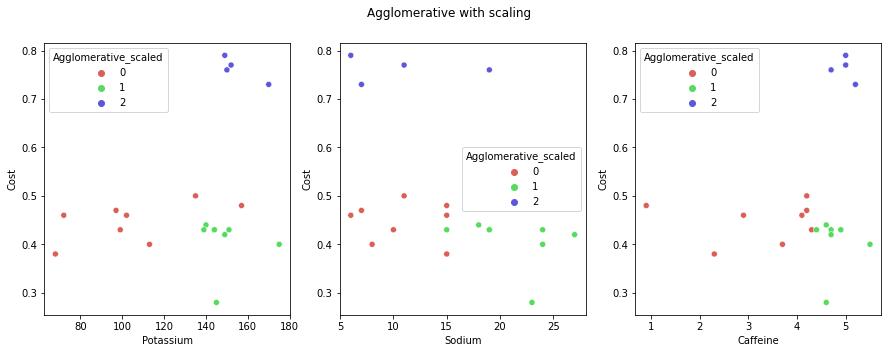

In [43]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('KMeans without scaling')
sns.scatterplot(ax=axes[0],x=data.Potassium,y=data.Cost, hue=data.Kmeans, palette=sns.color_palette('hls', 3))
sns.scatterplot(ax=axes[1],x=data.Sodium,y=data.Cost, hue=data.Kmeans, palette=sns.color_palette('hls', 3))
sns.scatterplot(ax=axes[2],x=data.Caffeine,y=data.Cost, hue=data.Kmeans, palette=sns.color_palette('hls', 3))
plt.show()

fig, axes = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('KMeans with scaling')
sns.scatterplot(ax=axes[0],x=data.Potassium,y=data.Cost, hue=data.Kmeans_scaled, palette=sns.color_palette('hls', 3))
sns.scatterplot(ax=axes[1],x=data.Sodium,y=data.Cost, hue=data.Kmeans_scaled, palette=sns.color_palette('hls', 3))
sns.scatterplot(ax=axes[2],x=data.Caffeine,y=data.Cost, hue=data.Kmeans_scaled, palette=sns.color_palette('hls', 3))
plt.show()

fig, axes = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('Agglomerative without scaling')
sns.scatterplot(ax=axes[0],x=data.Potassium,y=data.Cost, hue=data.Agglomerative, palette=sns.color_palette('hls', 3))
sns.scatterplot(ax=axes[1],x=data.Sodium,y=data.Cost, hue=data.Agglomerative, palette=sns.color_palette('hls', 3))
sns.scatterplot(ax=axes[2],x=data.Caffeine,y=data.Cost, hue=data.Agglomerative, palette=sns.color_palette('hls', 3))
plt.show()

fig, axes = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('Agglomerative with scaling')
sns.scatterplot(ax=axes[0],x=data.Potassium,y=data.Cost, hue=data.Agglomerative_scaled, palette=sns.color_palette('hls', 3))
sns.scatterplot(ax=axes[1],x=data.Sodium,y=data.Cost, hue=data.Agglomerative_scaled, palette=sns.color_palette('hls', 3))
sns.scatterplot(ax=axes[2],x=data.Caffeine,y=data.Cost, hue=data.Agglomerative_scaled, palette=sns.color_palette('hls', 3))
plt.show()

# Conclusion

By judging from the plots we could say that the three clusters are: 

0. low cost low caffeine
1. low cost high caffeine
2. high cost high caffeine

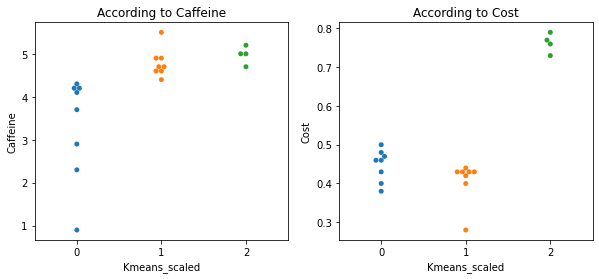

In [44]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
sns.swarmplot(data.Kmeans_scaled, data.Caffeine, ax=ax)
ax.set_title('According to Caffeine')

ax = fig.add_subplot(122)
sns.swarmplot(data.Kmeans_scaled, data.Cost, ax=ax)
ax.set_title('According to Cost')

plt.show()

 # Now, lets see the difference between Kmeans and Agglomerative clustering.


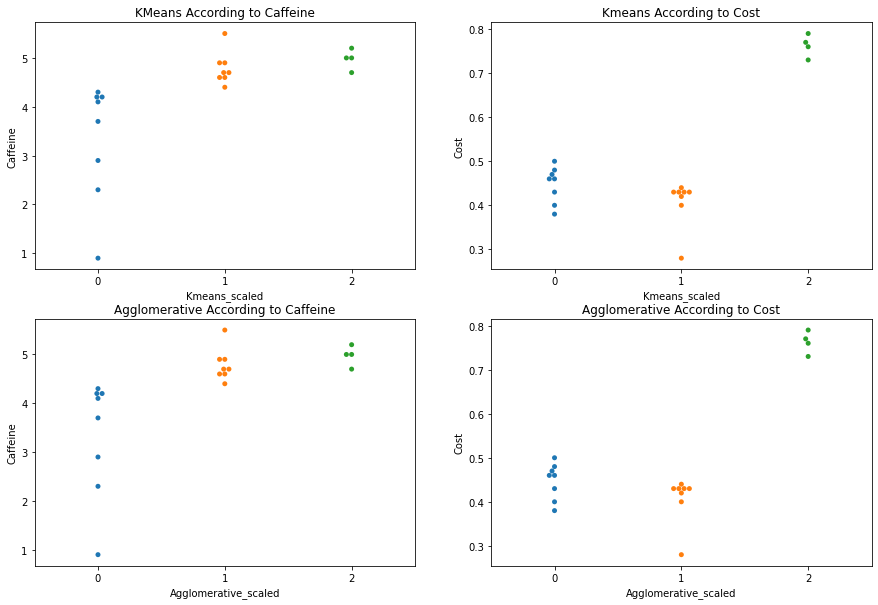

In [45]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
ax = axes[0,0]
sns.swarmplot(data.Kmeans_scaled, data.Caffeine, ax=ax)
ax.set_title('KMeans According to Caffeine')

ax = ax=axes[0,1]
sns.swarmplot(data.Kmeans_scaled, data.Cost, ax=ax)
ax.set_title('Kmeans According to Cost')

ax = ax=axes[1,0]
sns.swarmplot(data.Agglomerative_scaled, data.Caffeine, ax=ax)
ax.set_title('Agglomerative According to Caffeine')

ax = ax=axes[1,1]
sns.swarmplot(data.Agglomerative_scaled, data.Cost, ax=ax)
ax.set_title('Agglomerative According to Cost')

plt.show()

We obtained same result for both the types.